In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

### Load Data From CSV File


In [ ]:
dataset = pd.read_csv("Levels_Fyi_Salary_Data.csv")
columns = ["tag", "gender", "otherdetails", "Race", "Education"]
dataset.head()


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


### Replace NaN values

In [ ]:
from sklearn.impute import SimpleImputer
dataset = dataset.dropna()
dataset.shape

(21521, 29)

In [ ]:
features = dataset[['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus']]
X = np.asarray(features)
X[0:6]

array([[4.00e+05, 5.00e+00, 5.00e+00, 2.10e+05, 1.45e+05, 4.50e+04],
       [1.36e+05, 3.00e+00, 2.00e+00, 1.24e+05, 1.00e+03, 1.10e+04],
       [3.37e+05, 6.00e+00, 6.00e+00, 1.77e+05, 1.25e+05, 3.60e+04],
       [2.22e+05, 4.00e+00, 4.00e+00, 1.64e+05, 3.80e+04, 2.00e+04],
       [1.87e+05, 5.00e+00, 0.00e+00, 1.65e+05, 2.20e+04, 0.00e+00],
       [3.10e+05, 1.50e+01, 3.00e+00, 1.60e+05, 1.50e+05, 0.00e+00]])

## Data pre-processing and selection

We want the model to predict the value of title (that is, Software Engineer (= 'S') or ProductManager (= 'P')). As this field can have one of only two possible values, we need to change its measurement level to reflect this.

In [ ]:
dataset['title'] = dataset['title'].astype('object')
y = np.asarray(dataset['title'])
y [0:6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['Software Engineer', 'Software Engineer', 'Software Engineer',
       'Software Engineer', 'Software Engineer', 'Software Engineer'],
      dtype=object)

## Train/Test dataset


Split our dataset into train and test set:

---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (17216, 6) (17216,)
Test set: (4305, 6) (4305,)


<h2 id="modeling">Modeling (SVM with Scikit-learn using RBF kernel)</h2>

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

After being fitted, the model can then be used to predict new values:


In [ ]:
yhat = clf.predict(X_test)
yhat [0:6]

array(['Software Engineer', 'Software Engineer', 'Software Engineer',
       'Software Engineer', 'Software Engineer', 'Software Engineer'],
      dtype=object)

<h2 id="evaluation">Evaluation</h2>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                              precision    recall  f1-score   support

            Business Analyst       0.00      0.00      0.00        80
              Data Scientist       0.00      0.00      0.00       176
           Hardware Engineer       0.00      0.00      0.00       156
             Human Resources       0.00      0.00      0.00        26
       Management Consultant       0.00      0.00      0.00        92
                   Marketing       0.00      0.00      0.00        73
         Mechanical Engineer       0.00      0.00      0.00        54
            Product Designer       0.00      0.00      0.00       123
             Product Manager       0.00      0.00      0.00       269
                   Recruiter       0.00      0.00      0.00        43
                       Sales       0.00      0.00      0.00        41
           Software Engineer       0.63      1.00      0.78      2730
Software Engineering Manager       0.00      0.00      0.00       213
          Solution 

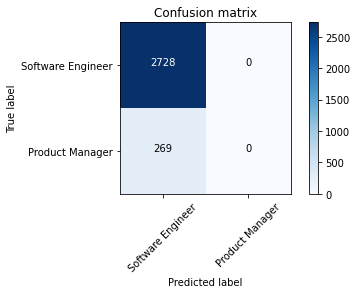

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['Software Engineer','Product Manager'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Software Engineer','Product Manager'],normalize= False,  title='Confusion matrix')

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.49195257202109904